In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("./datasets/titanic_train.csv")
test = pd.read_csv("./datasets/titanic_test.csv")

- passengerid: 탑승자 데이터 일련번호
- survived : 생존 여부, 0=사망 ,1=생존
- Pclass : 티켓의 선실등급 1=일등석, 2= 이등석,3= 삼등석
- sex : 탑승자 성별
- name : 탑승자 이름
- age : 탑승자 나이
- sibsp : 같이 탑승한 형제자메 또는 배우자 인원수
- parch : 같이 탑승한 부모님 또는 어린이 인원수
- ticket : 티켓 번호
- fare: 요금
- cabic : 선실번호
- embarked : 중간 정착 항구 C = cherbourg,Q=Queenstown, s= southampton

In [3]:
print("### train 데이터 정보 ##\n")
train.info()

### train 데이터 정보 ##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train['Age'].fillna(train['Age'].mean(),inplace=True)
train['Cabin'].fillna('N',inplace=True)
train['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null값 개수',train.isnull().sum() )

데이터 세트 Null값 개수 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [5]:
print('Sex 값 분포: \n',train['Sex'].value_counts())
print('\n Cabin 값 분포: \n',train['Cabin'].value_counts())
print('\n Embarked 값 분포: \n',train['Embarked'].value_counts())

Sex 값 분포: 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포: 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [6]:
print(train['Cabin'])
train['Cabin']=train['Cabin'].str[:1]
train['Cabin']

0         N
1       C85
2         N
3      C123
4         N
       ... 
886       N
887     B42
888       N
889    C148
890       N
Name: Cabin, Length: 891, dtype: object


0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [7]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex,Survived'>

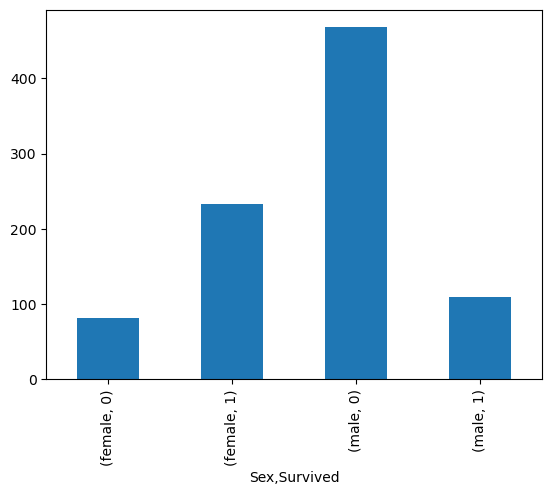

In [8]:
train.groupby(['Sex','Survived'])['Survived'].count().plot.bar()

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Cabin'].fillna('N',inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace = True)

In [11]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [12]:
train_df = pd.read_csv("./datasets/titanic_train.csv")
test_df = pd.read_csv("./datasets/titanic_test.csv")

In [13]:
train_df=transform_features(train_df)
test_df = transform_features(test_df)

In [14]:
train_df.head()


,Survived,Pclass,Sex,Age,Cabin,Embarked
0,0,3,1,22.0,7,3
1,1,1,0,38.0,2,0
2,1,3,0,26.0,7,3
3,1,1,0,35.0,2,3
4,0,3,1,35.0,7,3


In [15]:
test_df.head()

,Pclass,Sex,Age,Cabin,Embarked
0,3,1,34.5,7,1
1,3,0,47.0,7,2
2,2,1,62.0,7,1
3,3,1,27.0,7,2
4,3,0,22.0,7,2


#### features와 label 분리

In [16]:
x_train = train_df.drop("Survived",axis=1)
y_train = train['Survived']

In [17]:
x_test = test_df
y_test = pd.read_csv('./datasets/titanic_test_y.csv')
y_test = y_test['Survived']


In [18]:
y_test.value_counts()

0    266
1    152
Name: Survived, dtype: int64

### datascailng

In [19]:
# StandardScaler를 이용한 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.fit_transform(x_test)

In [20]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=['Pclass','Sex','Age','Cabin','Embarked'])
x_test_scaled = pd.DataFrame(x_test_scaled,columns=['Pclass','Sex','Age','Cabin','Embarked'])

#### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=156)
dt.fit(x_train_scaled,y_train)
result_1 = dt.predict(x_test_scaled)

print('예측 정확도: {0:3f}'.format(accuracy_score(y_test,result_1)))

예측 정확도: 0.827751


#### RandomForest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=156)
rfc.fit(x_train_scaled,y_train)
result_2 = rfc.predict(x_test_scaled)

print('예측 정확도: {0:3f}'.format(accuracy_score(y_test,result_2)))

예측 정확도: 0.825359


#### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
result_3 = lr.predict(x_test_scaled)

print('예측 정확도: {0:3f}'.format(accuracy_score(y_test,result_3)))

예측 정확도: 0.947368


### 교차검증


In [60]:
from sklearn.model_selection import cross_val_score
import numpy as np
ml = [dt,rfc,lr]
accuracy_list= []
for i in ml:
    print(i)
    scores = cross_val_score(i,x_train_scaled,y_train,cv=5)
    for iter_count,accuracy in enumerate(scores):
        print(f'교차검증{iter_count} 정확도{accuracy}')
        accuracy_list.append(accuracy)
    print(f'평균정확도 {np.mean(accuracy_list)}')

DecisionTreeClassifier(random_state=156)
교차검증0 정확도0.7821229050279329
교차검증1 정확도0.7808988764044944
교차검증2 정확도0.8146067415730337
교차검증3 정확도0.8089887640449438
교차검증4 정확도0.8370786516853933
평균정확도 0.8370786516853933
RandomForestClassifier(random_state=156)
교차검증0 정확도0.7821229050279329
교차검증1 정확도0.7808988764044944
교차검증2 정확도0.7808988764044944
교차검증3 정확도0.8146067415730337
교차검증4 정확도0.8202247191011236
평균정확도 0.8202247191011236
LogisticRegression()
교차검증0 정확도0.7988826815642458
교차검증1 정확도0.7921348314606742
교차검증2 정확도0.7808988764044944
교차검증3 정확도0.7865168539325843
교차검증4 정확도0.8033707865168539
평균정확도 0.8033707865168539


In [68]:
### from sklearn.model_selection import GridSearchCV

param = {'max_depth':[2,3,5,10],
        'min_samples_split':[2,3,5],
        'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt,param_grid=param,scoring='accuracy',cv=5)
grid_dclf.fit(x_train_scaled,y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print(f'GrdiSearchCV 최고 정확도: {grid_dclf.best_score_}')
best_dclf = grid_dclf.best_estimator_

### GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpred = best_dclf.predict(x_test_scaled)
accuracy = accuracy_score(y_test,dpred)
print(f'테스트 세트에서의 DecisionTreeClassifier 정확도 {accuracy}')

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
GrdiSearchCV 최고 정확도: 0.8181783943255289
테스트 세트에서의 DecisionTreeClassifier 정확도 0.8827751196172249


### confusion metrics

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('confusion matrix')
    print(confusion)
    print(f'정확도: {np.round(accuracy,4)},정밀도{np.round(precision,4)}, 재현율{np.round(recall,4)}')
    
get_clf_eval(y_test,dpred)

confusion matrix
[[259   7]
 [ 42 110]]
정확도: 0.8828,정밀도0.9402, 재현율0.7237
